# NNIA 18/19 Project 1:  PCA and & (Multiple) Linear Regression 

## Deadline: 07. December 2018, 23:59

**Important:** For all implementations in this project, make sure to use NumPy whenever possible. Most computations on vectors and matrices can be implemented very efficiently using the NumPy API. There is no need for looping over vectors etc. As a simple example, in order to compute the mean of a vector, just use `numpy.mean()`. If you are not familiar with NumPy please consult the NumPy tutorial that you find in the CMS under *Materials*. Further, in case of any doubts, the Forum is the best place to ask questions and discuss the project.  

In [16]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

---

## 1. Principal Component Analysis $~$ (15.0 points)

Features are our friends for prediction. For example, knowing the weight of a person is helpful for predicting his/her height. Knowing both the weight and age may improve the accuracy of our prediction. However, too many features could harm: each feature can be thought of as a dimension, $n$ features correspond to a $n$ dimensional space. In a high dimensional space ($n$ is very large), our data will distribute sparsely: if you draw unit grids in the space, the most of them will contain no data, which obstructs the learning process. This is called the *curse of dimensionality* (for more detail about the curse of dimensionality, see [here](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)).


To overcome the curse of dimensionality, we simply reduce the dimensionality (i.e. reduce the number of features). We can either select a subset of all features, or we can apply PCA on our dataset. By specifying a $d$ ($d$<$n$), PCA will project our $n$ dimensional data onto a $d$ dimensional (affine) space. The assumption is that classification/regression should be easier in this $d$ dimensional space.

A tutorial of PCA can be found here: [PCA Tutorial](http://www.iro.umontreal.ca/~pift6080/H09/documents/papers/pca_tutorial.pdf) 

The goal of this exercise is to apply PCA on a small dataset: [The Digits Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) 

#### 1.1. Data Normalization
Before applying PCA to our data, we first need to center the features by subtracting the mean of each feature. That is, given a design matrix $X \in \mathbb{R}^{n \times d}$ ($n$ samples, each with $d$ dimensional features), we apply the following formula:

\begin{equation*}
  \hat{x_{ij}} = x_{ij} - \mu(x_i) \textrm{ for } i = 1,\cdots, d, j = 1,\cdots,n
\end{equation*}

where $\mu(x_i)$ is the mean of the $i$-th column of $X$.

**Question 1:** Is this centering step important regarding the performance of the PCA? What might happen if we don't center our data? (1 point)

In [17]:
*Answer:* 


SyntaxError: invalid syntax (<ipython-input-17-0cd8f71c5bcd>, line 1)

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

**Task 1:** Implement the following function which performs data normalization (i.e. normalize the columns of $X$) according to the description above. (1 point)

In [18]:
def data_normalization(data):
    # TODO: implement
    data_normalized=data-np.mean(data,axis=0).T

    # data_normalized = 
    
    return data_normalized

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

#### 1.2  Apply PCA on Digits Dataset
In the following we will apply PCA on the digits dataset from sklearn. This dataset consists of 1797 images of size 8X8, each images contain a handwritten digit (0-9).
The digits look as follows:
![Image of digits](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png)

In [19]:
# import the digits dataset
from sklearn import datasets

In [42]:
# perform data normalization
data_matrix = datasets.load_digits().data
targets = datasets.load_digits().target
#data_normalized = data_normalization(data_matrix)
data_normalized = data_normalization_modified(data_matrix)
data_normalized.shape

(1797, 61)

Before applying PCA, let's take a look on a subset of original features and analyse whether they are discriminative for digits classification.

**Task 2:** Implement the following using matplotlib: (2 points)
1. Construct a 2D scatter plot. Plot the value of feature 0 (on $x$ axis) and feature 2 (on $y$ axis) for each data point, use different colors indicating different classes. 
2. Set corresponding labels: assign label "feature 0" for $x$ axis and "feature 2" for $y$ axis.
3. Set the title of the plot as "A subset of original features".
4. Show legends for each class.
5. After you have finished the first four steps and plotted the graph, you might observe that many data points overlap. This is because many data points have exactly the same value w.r.t. feature 0 and feature 2. In order to have a better visualization, please jitter the data points in your scatter plot, this step is called jittering. For more details about jittering, see [here](https://stats.stackexchange.com/questions/253009/why-jitter-continuous-value-in-a-scatterplot).



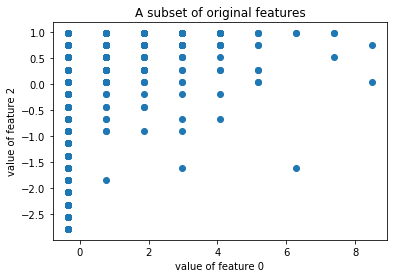

8.485857177157692


In [43]:
# TODO: Construct a 2D scatter plot
x = data_normalized[:,0] 
y = data_normalized[:,2]
#x=np.random.rand(1797)+x-0.5
plt.scatter(x,y)

plt.ylabel('value of feature 2')
plt.xlabel('value of feature 0')
plt.title('A subset of original features')
plt.show()
print(np.max(x))

---
**Points:** $0.0$ of $2.0$
**Comments:** None

---

**Question 2:** What is the dimensionality of the new feature space? Is is easy to perform digit classification in this feature space? Justify your answer. (1 point)

*Answer:* 


---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

**Task 3:** Implement the function `PCA()` below. The input of this function is a normalized dataset and a parameter $d$, which specifies the output dimension (dimension of the projected space). The output should be a dataset/matrix of $\mathbb{R}^{n \times d}$. (Hint: `numpy.linalg.eig()` might be helpful here.) (4 points)

In [135]:
def PCA(data, d):
    """
    perform PCA on a dataset
    :param data: input dataset with shape (n,k).
    :param d: dimension of the output space.
    :return: a matrix of shape (n,d). where each row represents the (PCA) projection of each data point.
    """
    # TODO: implement
    # REMARK: note the eigenvalues/eigenvectors returned by np.linalg.eig() might not be ordered. You may want to order them first. 
    D=np.dot(data.T,data)
    eigenval,eigenvec=np.linalg.eig(D)
    eigenval=np.sort(eigenval)
  
    d_eigenval=eigenval[-1-d:-1]
    print('egenval',eigenval[-1-d:-1])
    print(d)
    #print('eigenvec:',eigenvec)
    #print('eigenval:',eigenval)

    for i in range (0,d):
        eigenvec[d_eigenval[i]==eigenval,:]
    
    #if d_biggest.shape[1]>d:
     #   d_biggest=d_biggest[0:-1,:]
        
    PCA=np.dot(data,d_biggest.T)
    #print('PCA',PCA)
    print('eigenvec',d_eigenval[1]==eigenval)
    print('d_biggest',d_biggest.shape)
    return PCA_mat 
    pass

---
**Points:** $0.0$ of $4.0$
**Comments:** None

---

**Task 4:** Apply `PCA()` on the normalized dataset using $d=2$, then construct a 2D scatter plot presenting the data points in the projected space. (2 points)

Requirements for the 2D scatter plot:
1. Plot the value of the first principle components (on $x$ axis) and the second principle components (on $y$ axis) of each data point, use different colors for each class. 
2. Set corresponding labels: assign label "first principle component" for $x$ axis and "second principle component" for $y$ axis.
3. Set the title of the plot as "2 component PCA".
4. Add legends for each class.


In [136]:
# TODO: perform PCA on mean centered dataset
PCA_mat=PCA(data_normalized, 2)
PCA_mat.shape

egenval [ 9256.51427285 10480.54100504]
2


NameError: name 'd_biggest' is not defined

In [86]:
# TODO: Construct a 2D scatter plot



x = PCA_mat[:,0] 
y = PCA_mat[:,1]

#x=np.random.rand(1797)/5+x-0.5
plt.scatter(x,y)
#plt.plot(x, y)

plt.xlabel('value of the first principle components')
plt.ylabel('value of the seccond principle components')
plt.title('data points in the projected space')


plt.show()






IndexError: index 1 is out of bounds for axis 1 with size 1

---
**Points:** $0.0$ of $2.0$
**Comments:** None

---

**Question 3:** Is it easier to perform classification on the transformed space? Justify your answer. (1 point)

*Answer:* 

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

**Question 4:** Now, modify the function  `data_normalization()` you implemented above: in additional to centering, divide each feature/column by its standard deviation. Then apply `PCA()` on this standardized data. Does the performance of PCA improve? Describe your findings (instead of modifying the original function you implemented above, please implement it again in the cell below). (2 points)

***Remark:*** One problem could occur when you divide the feature by its standard deviation: the standard deviation might be zero and division by zero is undefined. However, a standard deviation of zero can only be possible when all the values of a feature/column are the same (all equal to the mean). In this case, those features have no discriminative power so they can be removed from the analysis. Your implementation should be able to handle this case: all columns with zero standard deviation should be removed before standardize the data.

In [24]:
def data_normalization_modified(data):
    # TODO: implement
    data_normalized=(data-np.mean(data,axis=0).T)
    NoZeroDev=data_normalized[:,np.std(data_normalized, axis=0)!=0]
    data_normalized=np.multiply(NoZeroDev,np.reciprocal(np.std(NoZeroDev, axis=0)))
    
    return data_normalized

*Answer:* 


---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

Finally, consider and the following (artificially generated) dataset:

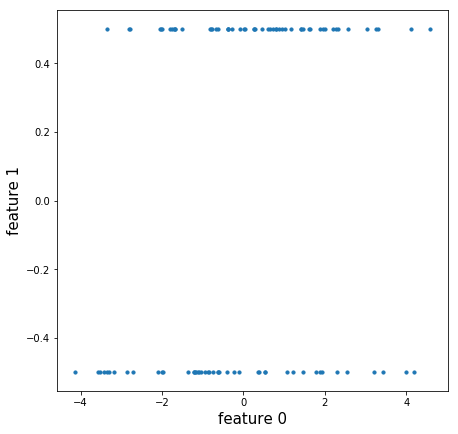

In [12]:
x = np.random.normal(loc=0.0, scale=2.0, size=100)
y = np.random.binomial(1, 0.5, size=100) - 0.5

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 0', fontsize = 15)
ax.set_ylabel('feature 1', fontsize = 15)
ax.scatter(x,y,s = 10);

**Question 5:** Is PCA suitable for the above dataset? Justify your answer. (1 point)

*Answer:* 


---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

## Multiple Linear Regression (15.0 points)

In this exercise we will deal with *multiple linear regression*. Performing regression on one independent (or explanatory) variable and a scalar dependent variable is called **simple linear regression**.
But, when there are more than one explanatory variable (i.e. $x^{(1)}, x^{(2)}, ...,x^{(k)}$), and a single scalar dependent variable (*y*), then it's called **multiple linear regression**. (Please don't confuse this with *multivariate linear regression* where we predict more than one (correlated) dependent variable.)

Here, we will implement a **multiple linear regression** model in Python/NumPy using the *Gradient Descent* algorithm. Particularly, we will be using **stochastic gradient descent** (*SGD*) where one performs the update step using a small set of training samples of size *batch_size* which we will set to 64, i.e. we go through the training samples sampling 64 at a time and perform gradient descent. Such a procedure is sometimes called **mini-batch gradient descent** in the deep learning community.

Going through all the training samples *once* is called an **epoch**. Ideally, the algorithm has to go through multiple epochs over the training samples, each time shuffling it, until a convergence criterion has been satisfied.

Here, we will set a *tolerance value* for the difference in error (i.e. change in mean squared error (MSE) values between subsequent epochs) that we will accept. Once this difference falls below the *tolerance value*, we terminate our training phase and return the parameters. 

We repeat the above training procedure for all possible hyperparameter combinations in order to find the best parameters (i.e. weights) for our model. For this so called *hyperparameter tuning* we will be using the validation data. 

As a next step, we will combine training data and validation data and make it as our *new training data*. We keep the test data as it is. Using the hyperparameter combination (for the least MSE) that we found above, we train the model *again* with the *new training data* and obtain the parameter (*i.e. weight vector*) after convergence according to our *tolerance value*.

Phew! That will be our much desired *weight vector*. This is then used on the *test data*, which has not been seen by our algorithm so far, to make a prediction. The resulting MSE value will be the so-called [*generalization error*](https://en.wikipedia.org/wiki/Generalization_error). It is this *generalization error* that we want it to be as low as possible for *unseen data* (implies that we can achieve higher accuracy).

#### 2.1 Dataset
For our task, we will be using the *Wine Quality* dataset and predict the quality of white wine based on 11 features such as acidity, citric acid content, residual sugar etc. . You can take a glance of the data using functions like *data.head()*.

In [167]:
# get data
data_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data = pd.read_csv(data_url, sep=';')

# inspect data
display(data.head())
print(data.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)


#### 2.2. Loss function
We will use a *regularized* form of the MSE loss function. In matrix form it can be written as follows:

\begin{equation*}
    J(\textbf{w}) = \frac{1}{2} \Vert{X\textbf{w}-\textbf{y}}\Vert^{2} + \frac{\lambda}{2}\Vert{\textbf{w}}\Vert^{2}
\end{equation*}

It's important to note that, in the above equation, $X$, called **design matrix**, consists of data points in our dataset. Each row corresponds to a data point, each column correspondings to a feature. Therefore, the dimension of $X$ is *(number of data points, number of features)*. $X$ can be also thought as of the horizontal concatenation of shape *(batch_size, num_features)*. To make things easier, you can add the *bias* term as the first column of $X$. Take care to have the *weight* vector $\textbf{w}$ with matching dimensions. (Hint: see [Design_matrix#Multiple_regression](https://en.wikipedia.org/wiki/Design_matrix#Multiple_regression) for how $X$ with 2 features looks like for $1^{st}$ degree polynomial.)

**Task 5:** Derive the gradient (w.r.t $\textbf{w}$) for the regularized loss function given in 2.2. (1 point)

*Answer:* 
\begin{equation*}
    J(\textbf{w}) =  \textbf{X}^{-1} \Vert{X\textbf{w}-\textbf{y}}\Vert + \lambda\Vert{\textbf{w}}\Vert
\end{equation*}

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

#### 2.3. Matrix format for higher order polynomial

Written in matrix form, a linear regression model for second order would look like: <br />
$$\hat{\textbf{y}} = X\textbf{w}_{1} + X^{2}\textbf{w}_{2} + \textbf{b}$$

where $X^{2}$ is the element-wise squaring of the original design matrix $X$, $\textbf{w}_1$ and $\textbf{w}_2$ are the *weight* vectors, and **b** is the *bias* vector.

**Task 6:** Please write down the matrix format for a $9^{th}$ order linear regression model. (0.5 point)

*Answer:* 

---
**Points:** $0.0$ of $0.5$
**Comments:** None

---

#### 2.4. Hyperparameters
Next, we will experiment with three hyperparameters:

i) regularization parameter $\lambda$ <br />
ii) learning rate $\epsilon$ <br />
iii) order of polynomial *p*

And do a grid search over the values that these hyperparameters can take in order to select the best combination (i.e. the one that achieves lowest test error). This approach is called **hyperparameter optimization or tuning**.

In [184]:
# Fix possible hyperparameters
polynomial_orders = [1, 5, 9]
learning_rates = [1e-5, 1e-8]
lambdas = [0.1, 0.8]

# Fix batch size
batch_size = 64

# Get data as NumPy array
data_np = data.values


#### 2.5. Normalization
First of all, inspect the data, and understand its structure and features. Ideally, before starting to train our learning algorithm, we would want the data to be normalized. Here, we normalize the data (i.e. normalize each column) using the formula:

\begin{equation*}
  norm\_x_i = \frac{x_i - min(x)}{max(x) - min(x)}
\end{equation*}
where $x_i$ is the $i^{th}$ sample in feature $x$. Note that this formula is different to the formula in the PCA part.

**Task 7:** Complete the following function which performs normalization (i.e. normalizes columns of $X$). (1 point)

In [185]:
def data_normalization2(data):
    # TODO: implement
    data_normalization=np.true_divide(data-np.min(data,axis=0),(np.max(data,axis=0)-np.min(data,axis=0)))
    return data_normalization
    pass

#Perform data normalization
#data_np=np.true_divide(data_np-np.min(data_np,axis=0),(np.max(data_np,axis=0)-np.min(data_np,axis=0)))
data_np = data_normalization2(data_np)
print(data_np[:5,:])  # print first 5 rows


[[0.30769231 0.18627451 0.21686747 0.30828221 0.10682493 0.14982578
  0.37354988 0.26778485 0.25454545 0.26744186 0.12903226 0.5       ]
 [0.24038462 0.21568627 0.20481928 0.01533742 0.11869436 0.04181185
  0.28538283 0.13283208 0.52727273 0.31395349 0.24193548 0.5       ]
 [0.41346154 0.19607843 0.24096386 0.09662577 0.12166172 0.09756098
  0.20417633 0.15403894 0.49090909 0.25581395 0.33870968 0.5       ]
 [0.32692308 0.14705882 0.19277108 0.12116564 0.14540059 0.15679443
  0.41067285 0.16367843 0.42727273 0.20930233 0.30645161 0.5       ]
 [0.32692308 0.14705882 0.19277108 0.12116564 0.14540059 0.15679443
  0.41067285 0.16367843 0.42727273 0.20930233 0.30645161 0.5       ]]


---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

**Question 5:** How is the normalization here different from the standardization implemented in the PCA exercise (see Question 4 in the PCA part)? (1 point)

*Answer:* 


---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

In [186]:
# Split the data into training, validation, and test data
def split_data(data, n_train=3898, n_val=500, n_test=500):
    # (in-place) shuffling of data_npr along axis 0
    np.random.shuffle(data)

    n_val = n_train + n_val
    n_test = n_train + n_test
    
    X_train = data[0:n_train, 0:-1]
    Y_train = data[0:n_train, -1]
    
    X_val = data[n_train:n_val, 0:-1]
    Y_val = data[n_train:n_val, -1]
    
    X_test = data[n_test:, 0:-1]
    Y_test = data[n_test:, -1]
    
    return [(X_train, Y_train), (X_val, Y_val), (X_test, Y_test)]


# Shuffle only the training data along axis 0
def shuffle_train_data(X_train, Y_train):
    """called after each epoch"""
    perm = np.random.permutation(len(Y_train))
    Xtr_shuf = X_train[perm]
    Ytr_shuf = Y_train[perm]
    
    return Xtr_shuf, Ytr_shuf

#### 2.6. Implementation of required functions

**Task 8:** Complete the following function which computes the MSE value. You can ignore the regularization term and also the constants $\frac{1}{2}$. (0.5 point)

In [187]:
# Compute Mean Squared Error 
def compute_mse(prediction, ground_truth):
    '''
    :param prediction: a nx1 vector represents the prediciton of your model
    :param ground_truth: a nx1 vector represents the ground_truth
    :return: MSE loss
    '''
    # TODO: implement
    mse = 0.0
    mse=np.sum(np.power(ground_truth-prediction,2))
    return mse

---
**Points:** $0.0$ of $0.5$
**Comments:** None

---

**Task 9:** Implement a function which computes the prediction of your model. (0.5 point)

In [188]:
def get_prediction(X, W):
    '''
    Given a design matrix X (could be a batch) and parameters W, calculate the prediction Y.
    :param X: desgin matrix X of dimension nxd, where n is the number of data points (in the batch).
    :param W: parameters
    :return: the predictions
    '''
    # TODO: implement
    pred = None
    pred=np.dot(X,W)
    return pred

---
**Points:** $0.0$ of $0.5$
**Comments:** None

---

**Task 10:** Implement a function which computes the gradient of your loss function. That is, implement the gradient computed in Task 5. (0.5 point)

In [ ]:
def compute_gradient(X, Y, Yhat, W, lambda_):
    '''
    :param X: designmatrix X
    :param Y: ground truth labels correspoinding to X
    :param Yhat: predicted labels
    :param W: parameters
    :param lambda_: coefficient for the regularizer
    :return: gradient w.r.t W
    '''
    # TODO: implement
    grad = None
    grad=np.dot(X.T,Yhat-Y)+np.dot(lambda_,W)
    return grad

---
**Points:** $0.0$ of $0.5$
**Comments:** None

---

**Task 11:** Implement a function which performs a single update step of SGD. (0.5 point)

In [ ]:
# Hint: avoid in-place modification
def sgd(gradient, lr, cur_W):
    '''
    :param gradient: gradient at cur_W
    :param lr: learning rate
    :param cur_W: current value of parameters
    :return: apply gradient descent
    '''
    # TODO: implement
    new_weights = None
    new_weights=cur_W+np.dot(lr,gradient)
    return new_weights

---
**Points:** $0.0$ of $0.5$
**Comments:** None

---

**Task 12:** Complete the following function which reformats your data as a design matrix. (0.5 point)

In [ ]:
# concatenate X acc. to order of polynomial; likewise do it for W
# where X is design matrix, W is the corresponding weight vector
# concatenate matrix X horizontally, concatenate W vertically. That is, after this transformation, X gets broader and W gets longer
# [1 X X^2 X^3], [1 W1 W2 W3].T.
# 
def prepare_data_matrix(X, W, order):
    # TODO: implement
    '''
    :param X: design matrix X
    :param W: weight vector W
    :param order: order of the polynomial
    :return: extended X and W
    '''
    X, W = None, None
    
    return X, W

---
**Points:** $0.0$ of $0.5$
**Comments:** None

---

#### 2.7. Training

**Task 13:** Complete the code in the following cell such that it performs **mini-batch gradient descent** on the training data for all possible hyperparameter combinations. (5 points)

Note: You can also define a function, named appropriately, which performs training. But, take care to do correct bookkeeping of hyperparameter combinations, weight vectors, and the MSE values.

In [ ]:
# Get the data
splits = split_data(data_np)
X_train, Y_train, X_val, Y_val, X_test, Y_test = itertools.chain(*splits)

# Set tolerance value
tolerance = 1e-3
start = 1

# Initialize weight vector
W_init = np.random.randn(X_train.shape[1])

In [ ]:
def train(X_train, W_init, polynomial_orders, learning_rates, lambdas):
    # Compute all hyperparameter combination
    comb_gen = itertools.product(*(polynomial_orders, learning_rates, lambdas))
    hparams_comb = list(comb_gen)

    # Cache weights for each hyperparam combination
    weights_hist = {hpm:0 for hpm in hparams_comb}
    mse_dict = {hpm:0 for hpm in hparams_comb}
    mse_hist = []
    
    # Find optimal hyperparameters
    for order in polynomial_orders:
        for lr in learning_rates:
            for lamb in lambdas:
                # Initialize 
                mse_hist.append(np.inf)
                mse_diff = np.inf
                epochs = 1
                # TODO: Prepare data matrix
                
                
                while True:
                    # TODO: shuffle the data
                    Xtr_shuf, Ytr_shuf = None
                    iteration = 1
                    nsamples = Xtr_shuf.shape[0]
                    bs = 0
                    
                    # Perform a single epoch
                    while bs < nsamples:
                        Xtr = Xtr_shuf[bs: bs+batch_size]
                        Ytr = Ytr_shuf[bs: bs+batch_size]
                        
                        # TODO: do one step gradient descent

                        
                        bs += batch_size
                        iteration += 1

                    # TODO: do predcition on the entire (shuffled) dataset, compute mse and append it to the mse_hist
                    
                    mse = None
                    mse_hist.append(mse)
                    #print("MSE after epoch {} is {}".format(epochs, round(mse, 5)))

                    #TODO: Stopping criterion: check whether diff-in-mse < tolerance
                    mse_diff = None
                    if mse_diff < tolerance:
                        #cache weight vector
                        weights_hist[(order, lr, lamb)] = W_vec
                        mse_dict[(order, lr, lamb)] = mse_hist[-1]
                        print("order: {} , learning rate: {} , regularizer: {} ".format(order, lr, lamb))
                        print("Convergence after epoch {} with MSE {}".format(epochs, round(mse_hist[-1], 5)), "\n")
                        break
                    epochs += 1
    
    return weights_hist, mse_hist

---
**Points:** $0.0$ of $5.0$
**Comments:** None

---

**Task 14:** Complete the following function which selects the best hyperparameter combination given a list of weights (i.e. the one that gives lowest MSE on **validation data**). (1 point)

In [ ]:
# Select hparams of minimum MSE on Validation data
def select_best_hparams(X_val, W):
    hpm_best = ()
    mse_best = np.inf
    
    # TODO: Implement

    return hpm_best, mse_best

In [ ]:
# TODO: Train the model with all possible hyperparameter combinations
W_init = np.random.randn(X_train.shape[1])

# TODO: Find best hyperparameter combination
best_hpm_combination, best_mse = None

print('Best hyperamarameters (on validation data): ', best_hpm_combination)
print('Corresponding MSE (on validation data): ', best_mse)

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

#### 2.8. Re-Training on Train + Validation data
**Task 15:** Complete the following function which does re-training on the combined training and validation data. (1 point)

In [ ]:
# Re-run the training on X_train + X_val combined

# TODO: implement

X_train_comb = None
Y_train_comb = None

# Initialize weight vector
W_comb_init = np.random.randn(X_train_comb.shape[1])

# Use already found best hparam comb
best_order, best_lr, best_lamb = best_hpm_combination

# Get data
X_mat, W_vec = prepare_data_matrix(X_train_comb, W_comb_init, best_order)

# Run training
# TODO: implement
weights, mse_cache = None

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

In [ ]:
# Let's plot the convergence of MSE values on the train+validation dataset using matplotlib, i.e. #epochs on X-axis and MSE values on Y-axis
fig, axes = plt.subplots()
axes.plot(mse_cache)
axes.set_yscale('linear')
axes.set_xlabel("epochs")
axes.set_ylabel("MSE");

#### 2.9. Evaluation on Test set
**Task 16:** Evaluate your model on test data. (1 point)

In [ ]:
# test your model on X_test with the weight vector that you found above
# this will be the generalization error of our model.

# TODO: implement
print("MSE achieved on X_test is : {}".format(round(mse_test, 6)))

---
**Points:** $0.0$ of $1.0$
**Comments:** None

---

#### 2.10. Results
**Task 17:** Report the MSE value on the test data. (0.5 point)

*Answer:* 


---
**Points:** $0.0$ of $0.5$
**Comments:** None

---

**Question 6:**  Which hyperparameter combination turned out to be the best? In your understanding, why do you think such a combination turned out to be the best for this task? (0.5 point)

*Answer:* 


---
**Points:** $0.0$ of $0.5$
**Comments:** None

---

## Submission instructions
You should provide a single Jupyter notebook (.ipynb file) as the solution. Put the names and student ids of your team members below. **Make sure to submit only 1 solution to only 1 tutor.**

- Jane Doe, 123456
- Jane Doe, 123456
- John Doe, 123456

---

## Points: 0.0 of 30.0 points